In [2]:
#import the packages:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras import initializers

In [3]:
image_path = "/Users/wangyingqi/Desktop/Tom and Jerry/tom_and_jerry/tom_and_jerry"

#create dataset of training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_path ,
    labels = "inferred",
    label_mode = "int",
    batch_size =32,
    image_size =(128,128),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "training",
)
#create dataset of validing
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_path ,
    labels = "inferred",
    label_mode = "int",
    batch_size =32,
    image_size =(128,128),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "validation",
)




Found 5478 files belonging to 4 classes.
Using 4383 files for training.


2023-03-07 09:13:07.271663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 5478 files belonging to 4 classes.
Using 1095 files for validation.


In [7]:
#build the model of CNN:
nor_lay = tf.keras.layers.Rescaling(1./255,input_shape =(128,128,3))

model = Sequential()
model.add(nor_lay)
model.add(layers.Conv2D(filters =32,kernel_size = (5,5),strides =2,padding = 'same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size = (5,5),strides = 2,padding = 'same'))
model.add(layers.Conv2D(filters =32,kernel_size = (5,5),strides =2,padding = 'same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size = (5,5),strides = 2,padding = 'same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 64,activation ='relu'))
model.add(layers.Dense(units =4,kernel_initializer =initializers.random_normal(stddev=0.01),activation ='softmax'))
    
model.compile(optimizer= tf.optimizers.Adam(learning_rate =0.001),
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = 'accuracy',
             )

epoch_num = 30
history = model.fit(train_ds,validation_data = test_ds,epochs = epoch_num)



Epoch 1/30
137/137 [==============================] - 10s 70ms/step - loss: 1.3372 - accuracy: 0.3541 - val_loss: 1.2602 - val_accuracy: 0.4274
Epoch 2/30
137/137 [==============================] - 10s 70ms/step - loss: 1.1498 - accuracy: 0.4914 - val_loss: 0.9832 - val_accuracy: 0.5653
Epoch 3/30
137/137 [==============================] - 10s 72ms/step - loss: 0.9582 - accuracy: 0.5909 - val_loss: 0.9590 - val_accuracy: 0.5954
Epoch 4/30
137/137 [==============================] - 11s 76ms/step - loss: 0.8337 - accuracy: 0.6523 - val_loss: 0.7792 - val_accuracy: 0.6849
Epoch 5/30
137/137 [==============================] - 11s 77ms/step - loss: 0.7463 - accuracy: 0.6966 - val_loss: 0.7147 - val_accuracy: 0.7306
Epoch 6/30
137/137 [==============================] - 11s 82ms/step - loss: 0.6661 - accuracy: 0.7317 - val_loss: 0.7416 - val_accuracy: 0.7105
Epoch 7/30
137/137 [==============================] - 12s 83ms/step - loss: 0.5786 - accuracy: 0.7643 - val_loss: 0.5818 - val_accuracy:

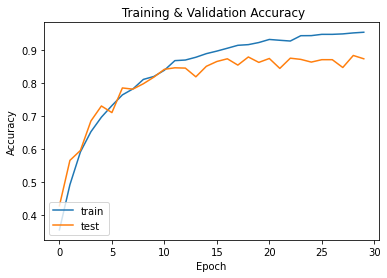

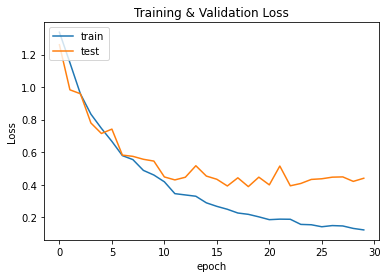

In [8]:
#make the image of the accuracy & loss of training and validation
#model compile first

plt.plot(range(epoch_num),history.history['accuracy'])
plt.plot(range(epoch_num),history.history['val_accuracy'])
plt.title(' Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower left') 
plt.show()


plt.plot(range(epoch_num),history.history['loss'])
plt.plot(range(epoch_num),history.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [11]:
nor_lay = tf.keras.layers.Rescaling(1./255,input_shape =(128,128,3))

model = Sequential()
model.add(nor_lay)
model.add(layers.Conv2D(filters =32,kernel_size = (5,5),strides =2,padding = 'same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size = (5,5),strides = 2,padding = 'same'))
model.add(layers.Conv2D(filters =32,kernel_size = (5,5),strides =2,padding = 'same',activation ='relu'))
model.add(layers.MaxPooling2D(pool_size = (5,5),strides = 2,padding = 'same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 128,activation ='relu'))
model.add(layers.Dense(units =4,kernel_initializer =initializers.random_normal(stddev=0.01),activation ='softmax'))
    
model.compile(optimizer= tf.optimizers.Adam(learning_rate =0.001),
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = 'accuracy',
             )

epoch_num = 100
history = model.fit(train_ds,validation_data = test_ds,epochs = epoch_num)

Epoch 1/100
137/137 [==============================] - 11s 80ms/step - loss: 1.3312 - accuracy: 0.3557 - val_loss: 1.2390 - val_accuracy: 0.4384
Epoch 2/100
137/137 [==============================] - 11s 82ms/step - loss: 1.0984 - accuracy: 0.5108 - val_loss: 0.8915 - val_accuracy: 0.6292
Epoch 3/100
137/137 [==============================] - 12s 83ms/step - loss: 0.8784 - accuracy: 0.6308 - val_loss: 0.7725 - val_accuracy: 0.6831
Epoch 4/100
137/137 [==============================] - 12s 84ms/step - loss: 0.7401 - accuracy: 0.6961 - val_loss: 0.7335 - val_accuracy: 0.7123
Epoch 5/100
137/137 [==============================] - 12s 87ms/step - loss: 0.6199 - accuracy: 0.7614 - val_loss: 0.7220 - val_accuracy: 0.7251
Epoch 6/100
137/137 [==============================] - 12s 88ms/step - loss: 0.5390 - accuracy: 0.7890 - val_loss: 0.5923 - val_accuracy: 0.7699
Epoch 7/100
137/137 [==============================] - 12s 89ms/step - loss: 0.5016 - accuracy: 0.8022 - val_loss: 0.5637 - val_ac

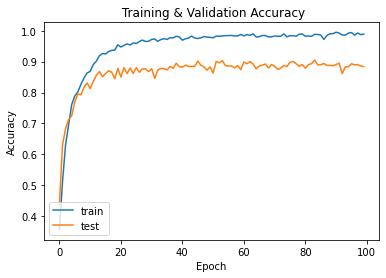

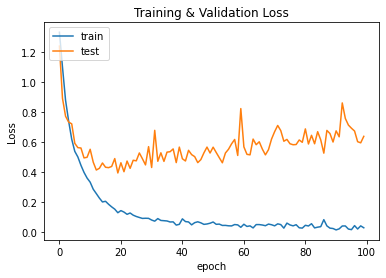

In [12]:
plt.plot(range(epoch_num),history.history['accuracy'])
plt.plot(range(epoch_num),history.history['val_accuracy'])
plt.title(' Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower left') 
plt.show()


plt.plot(range(epoch_num),history.history['loss'])
plt.plot(range(epoch_num),history.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [13]:
#model.summary:
model.save('m.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 32)         

In [14]:
# Q4:evaluate the test data:
print('    Evaluate on test data:   ')
result = model.evaluate(test_ds, verbose=1)
print("test loss & test acc :",result)


    Evaluate on test data:   
35/35 [==============================] - 1s 29ms/step - loss: 0.6388 - accuracy: 0.8840
test loss & test acc : [0.638752818107605, 0.8840182423591614]


In [15]:
#Q5:predict the test data:
print("Predict on test data")
prediction = model.predict(test_ds,verbose =1)
l = len(prediction)
print(l)
print(prediction)

Predict on test data
35/35 [==============================] - 1s 30ms/step
1095
[[2.2494394e-04 9.8435294e-06 9.9976522e-01 2.1537059e-09]
 [9.9976069e-01 1.0757259e-14 2.3934753e-04 1.7938131e-12]
 [1.0123175e-06 2.7153696e-06 9.9999630e-01 4.4905564e-14]
 ...
 [8.8705063e-02 7.1082432e-03 6.8044406e-01 2.2374269e-01]
 [7.9069395e-07 5.1162505e-09 9.9999917e-01 2.1302496e-13]
 [1.0000000e+00 2.6187127e-11 2.6928609e-08 9.7359308e-12]]


In [17]:
prediction_list=[]
for i in prediction:
    t = np.array(i)
    mid = np.argmax(t)
    prediction_list.append(mid)
print(len(prediction_list))

1095


1095
0-->jerry
1-->tom
2-->tom_jerry_0
3-->tom_jerry_1


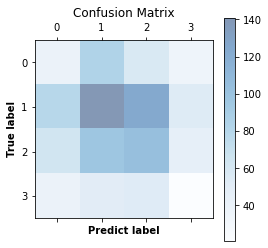

In [19]:
test_ds_list = []
test_labels =  np.array([])
for x, y in test_ds:
    test_labels = np.concatenate([test_labels, y.numpy()])
test_labels.shape
print(len(test_labels))
for i in test_labels:
    test_ds_list.append(i)


#make the confusion matrix:
print("0-->jerry")
print("1-->tom")
print("2-->tom_jerry_0")
print("3-->tom_jerry_1")
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_ds_list,prediction_list)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha = 0.5)
plt.colorbar()
plt.ylabel("True label",fontweight='bold')
plt.xlabel("Predict label",fontweight='bold')
plt.title("Confusion Matrix")
plt.show()

